# Traffic Camera: Detection and IOU tracking


## Imports

We will start by importing a few libraries:

In [1]:
import matplotlib.pyplot as plt
from detectionprovider import DetectionProvider
from IOUTracker import IOUTracker
from video import VideoStreamReader, VideoStreamWriter
from yolo import YOLO
from tqdm import tqdm
import numpy as np

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
set_session(tf.Session(config=config))

## Download 4K Traffic Cam Video

You will need **youtube-dl** to download the video. (You can ignore this step but still, you will need a video

In [ ]:
!youtube-dl -f 313 MNn9qKG2UFI

## View first frame

We will use OpenCV and Matplotlib to view the very first frame:

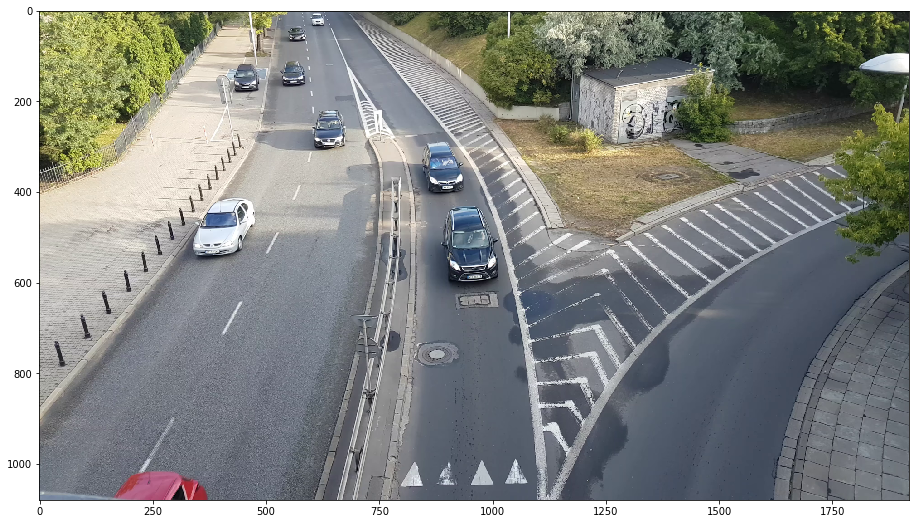

True

In [11]:
filename = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"

reader = VideoStreamReader(filename, seconds_count=5, width=1920, height=1080)
frame = reader.next_frame()
reader.release()
plt.figure(figsize=(16,9))
plt.imshow(frame)
plt.show()


frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  
cv2.imwrite("base.png", frame )

# Prepare YOLO network

In [3]:
yolo = YOLO()

model_data/yolo.h5 model, anchors, and classes loaded.


# Show detections for the first frame

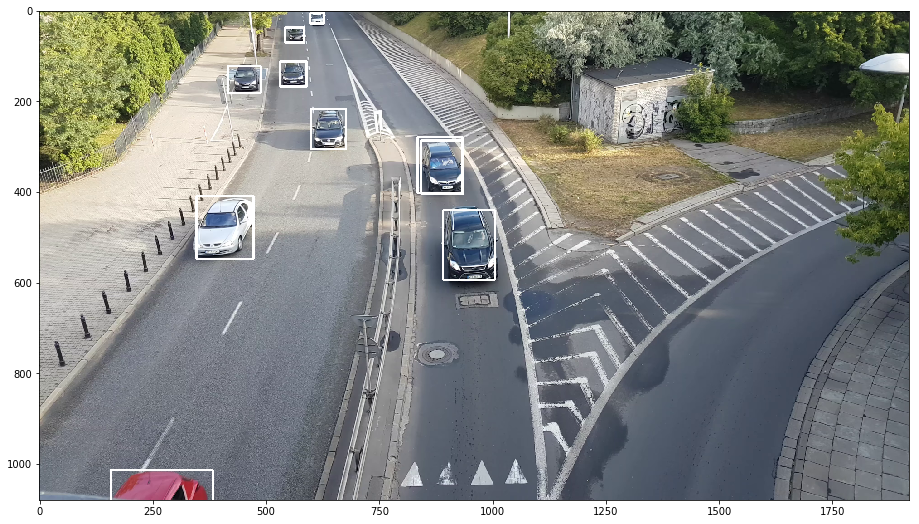

True

In [10]:
import cv2

detection_provider = DetectionProvider(yolo)
filename = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"

reader = VideoStreamReader(filename, seconds_count=5, width=1920, height=1080)
frame = reader.next_frame()
detections = detection_provider.detect_boxes(frame, reader.frame_no)
for detection in detections:
        detection.show(frame, (255, 255, 255), width=4)

reader.release()
plt.figure(figsize=(16,9))
plt.imshow(frame)
plt.show()

frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  
cv2.imwrite("detection.png", frame )

# Load frames and propagate through them

In [8]:
filename = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"
seconds_skip = 0 # number of seconds to skip
seconds_count = 50 # number of seconds to process

reader = VideoStreamReader(filename, seconds_count=seconds_count, seconds_skip=seconds_skip, width=1920, height=1080)
writer = VideoStreamWriter("quick1.avi", width=reader.width,height=reader.height,fps=reader.fps)
empty_writer = VideoStreamWriter("quick1.avi", width=reader.width,height=reader.height,fps=reader.fps)
detection_provider = DetectionProvider(yolo)

tracker = IOUTracker()

pbar = tqdm(total=reader.frame_count - reader.frame_skip)

while True:
    frame = reader.next_frame()
    
    if frame is None:
        break
        
    pbar.update()
    
    detections = detection_provider.detect_boxes(frame, reader.frame_no)
    
    for detection in detections:
        detection.show(frame, (255, 255, 255))
        
    tracker.predict()
    tracker.update(detections)

    zero_frame = np.zeros_like(frame)
    for track in tracker.active_tracks:
        track.show_history(zero_frame)
        track.show_history(frame)

    writer.write(frame)
    empty_writer.write(zero_frame)


 95%|█████████▍| 8518/9000 [29:24<01:38,  4.88it/s]


In [ ]:
pbar.close()
reader.release()
writer.release()
empty_writer.release()